In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import pandas_ta as ta

In [5]:
data = pd.read_csv('gold_Data10_23.csv')

In [6]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/25/2023,"1,995.10","1,995.40","2,005.00","1,979.30",0.85K,0.23%
1,04/24/2023,"1,990.60","1,983.20","1,991.00","1,975.30",0.54K,0.47%
2,04/21/2023,"1,981.30","2,005.10","2,007.00","1,973.00",0.62K,-1.42%
3,04/20/2023,"2,009.80","1,996.50","2,014.50","1,994.20",0.42K,0.59%
4,04/19/2023,"1,998.00","2,008.50","2,009.70","1,971.90",0.92K,-0.61%


In [7]:
data['Date'] = pd.to_datetime(data['Date']) 

In [8]:
data.sort_values(by='Date', inplace=True)

In [9]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
3439,2010-01-04,"1,118.30","1,099.00","1,124.60","1,093.80",155.48K,2.02%
3438,2010-01-05,"1,118.70","1,122.00","1,129.60","1,115.50",156.41K,0.04%
3437,2010-01-06,"1,136.50","1,118.50","1,141.00","1,116.80",176.90K,1.59%
3436,2010-01-07,"1,133.70","1,139.00","1,139.50","1,128.70",121.15K,-0.25%
3435,2010-01-08,"1,138.90","1,131.50","1,140.00","1,119.50",212.62K,0.46%


In [10]:
data['Vol.'].fillna('0', inplace=True)
def convert_k(value):
    if isinstance(value, str) and 'K' in value:
        return float(value.replace('K', '')) * 1000
    else:
        return float(value)

data['Vol.'] = data['Vol.'].apply(convert_k)

columns_with_commas = ['Price','Open', 'High', 'Low']
for column in columns_with_commas:
    data[column] = data[column].str.replace(',', '')

# Convierte las columnas al tipo de dato numérico
data[columns_with_commas] = data[columns_with_commas].astype(float)

data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

In [11]:
data.reset_index(drop=True, inplace=True)

In [12]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2010-01-04,1118.3,1099.0,1124.6,1093.8,155480.0,2.02
1,2010-01-05,1118.7,1122.0,1129.6,1115.5,156410.0,0.04
2,2010-01-06,1136.5,1118.5,1141.0,1116.8,176900.0,1.59
3,2010-01-07,1133.7,1139.0,1139.5,1128.7,121150.0,-0.25
4,2010-01-08,1138.9,1131.5,1140.0,1119.5,212620.0,0.46


In [21]:
data['RSI']=ta.rsi(data.Price, length=15)
data['EMAF']=ta.ema(data.Price, length=20)
data['EMAM']=ta.ema(data.Price, length=100)
data['EMAS']=ta.ema(data.Price, length=150)

In [22]:
data['Target'] = data['Price']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Price'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Vol.','Date'], axis=1, inplace=True)

In [23]:
data

,index,Date,Price,Open,High,Low,Vol.,Change %,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,149,2010-08-02,1185.4,1183.8,1193.9,1176.7,89850.0,0.13,45.773169,1190.448118,1181.239868,1160.800000,2.7,1,1187.5
1,150,2010-08-03,1187.5,1184.8,1193.0,1181.6,67040.0,0.18,46.682230,1190.167345,1181.363831,1161.153642,7.8,1,1195.9
2,151,2010-08-04,1195.9,1188.1,1205.5,1187.0,119100.0,0.71,50.256125,1190.713312,1181.651676,1161.613859,2.3,1,1199.3
3,152,2010-08-05,1199.3,1197.0,1202.8,1192.0,76530.0,0.28,51.661291,1191.531092,1182.001147,1162.113013,7.9,1,1205.3
4,153,2010-08-06,1205.3,1197.4,1213.3,1194.5,105720.0,0.50,54.112166,1192.842416,1182.462511,1162.685026,-3.7,0,1202.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,3434,2023-04-18,2010.3,1997.1,2013.4,1994.5,220.0,0.81,57.877284,1987.116495,1893.238340,1866.579597,-10.5,0,1998.0
3286,3435,2023-04-19,1998.0,2008.5,2009.7,1971.9,920.0,-0.61,55.169602,1988.153019,1895.312828,1868.320265,13.3,1,2009.8
3287,3436,2023-04-20,2009.8,1996.5,2014.5,1994.2,420.0,0.59,57.226462,1990.214637,1897.579901,1870.194169,-23.8,0,1981.3
3288,3437,2023-04-21,1981.3,2005.1,2007.0,1973.0,620.0,-1.42,51.153087,1989.365624,1899.237724,1871.665769,7.4,1,1990.6


In [25]:
data_set = data.iloc[:, 0:15]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)

,index,Date,Price,Open,High,Low,Vol.,Change %,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,149,2010-08-02,1185.4,1183.8,1193.9,1176.7,89850.0,0.13,45.773169,1190.448118,1181.239868,1160.800000,2.7,1,1187.5
1,150,2010-08-03,1187.5,1184.8,1193.0,1181.6,67040.0,0.18,46.682230,1190.167345,1181.363831,1161.153642,7.8,1,1195.9
2,151,2010-08-04,1195.9,1188.1,1205.5,1187.0,119100.0,0.71,50.256125,1190.713312,1181.651676,1161.613859,2.3,1,1199.3
3,152,2010-08-05,1199.3,1197.0,1202.8,1192.0,76530.0,0.28,51.661291,1191.531092,1182.001147,1162.113013,7.9,1,1205.3
4,153,2010-08-06,1205.3,1197.4,1213.3,1194.5,105720.0,0.50,54.112166,1192.842416,1182.462511,1162.685026,-3.7,0,1202.6
5,154,2010-08-09,1202.6,1206.3,1212.1,1201.1,69570.0,-0.22,52.820923,1193.771710,1182.861273,1163.213701,-5.3,0,1198.0
6,155,2010-08-10,1198.0,1203.3,1209.9,1192.5,101150.0,-0.38,50.616172,1194.174404,1183.161050,1163.674447,-7.7,0,1199.2
7,156,2010-08-11,1199.2,1206.9,1210.2,1194.2,117460.0,0.10,51.185664,1194.653032,1183.478653,1164.144984,16.1,1,1216.7
8,157,2010-08-12,1216.7,1200.6,1218.5,1199.5,124750.0,1.46,58.638464,1196.752744,1184.136501,1164.841077,0.5,1,1216.6
9,158,2010-08-13,1216.6,1216.1,1219.8,1212.3,73010.0,-0.01,58.583703,1198.642959,1184.779343,1165.526626,9.7,1,1226.2


In [26]:
columns_to_drop = ['index', 'Change %']
data_set = data_set.drop(columns=columns_to_drop)

In [27]:
data_set

,Date,Price,Open,High,Low,Vol.,Change %,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,2010-08-02,1185.4,1183.8,1193.9,1176.7,89850.0,0.13,45.773169,1190.448118,1181.239868,1160.800000,2.7,1,1187.5
1,2010-08-03,1187.5,1184.8,1193.0,1181.6,67040.0,0.18,46.682230,1190.167345,1181.363831,1161.153642,7.8,1,1195.9
2,2010-08-04,1195.9,1188.1,1205.5,1187.0,119100.0,0.71,50.256125,1190.713312,1181.651676,1161.613859,2.3,1,1199.3
3,2010-08-05,1199.3,1197.0,1202.8,1192.0,76530.0,0.28,51.661291,1191.531092,1182.001147,1162.113013,7.9,1,1205.3
4,2010-08-06,1205.3,1197.4,1213.3,1194.5,105720.0,0.50,54.112166,1192.842416,1182.462511,1162.685026,-3.7,0,1202.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,2023-04-18,2010.3,1997.1,2013.4,1994.5,220.0,0.81,57.877284,1987.116495,1893.238340,1866.579597,-10.5,0,1998.0
3286,2023-04-19,1998.0,2008.5,2009.7,1971.9,920.0,-0.61,55.169602,1988.153019,1895.312828,1868.320265,13.3,1,2009.8
3287,2023-04-20,2009.8,1996.5,2014.5,1994.2,420.0,0.59,57.226462,1990.214637,1897.579901,1870.194169,-23.8,0,1981.3
3288,2023-04-21,1981.3,2005.1,2007.0,1973.0,620.0,-1.42,51.153087,1989.365624,1899.237724,1871.665769,7.4,1,1990.6


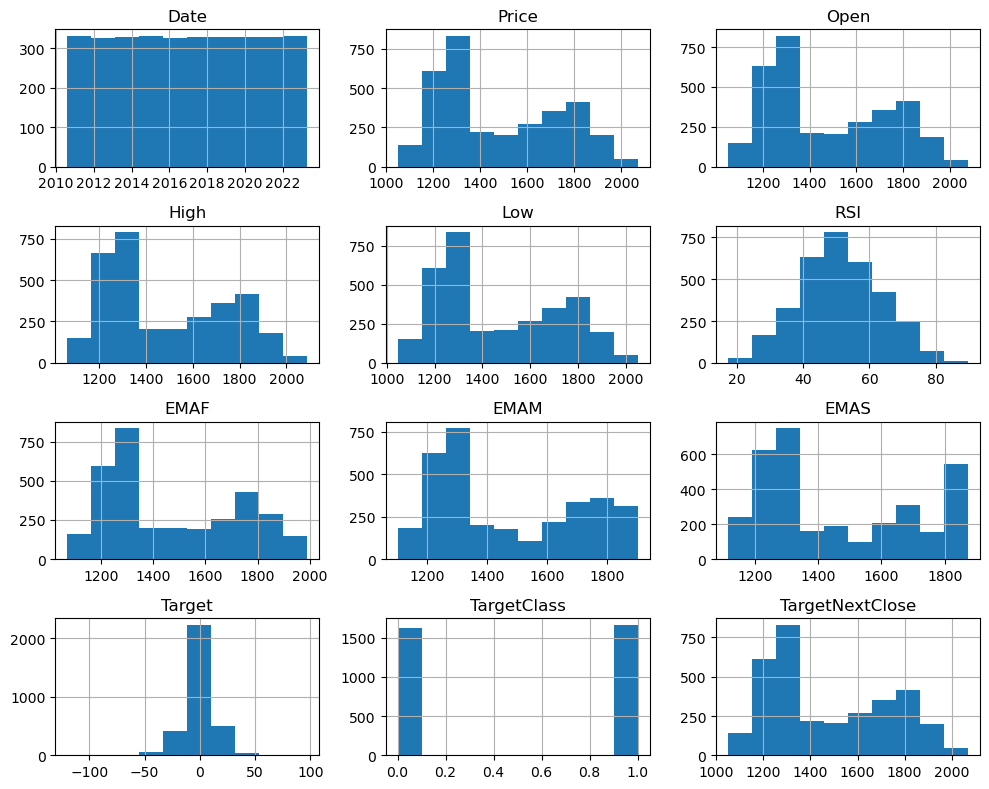

<Figure size 1000x800 with 0 Axes>

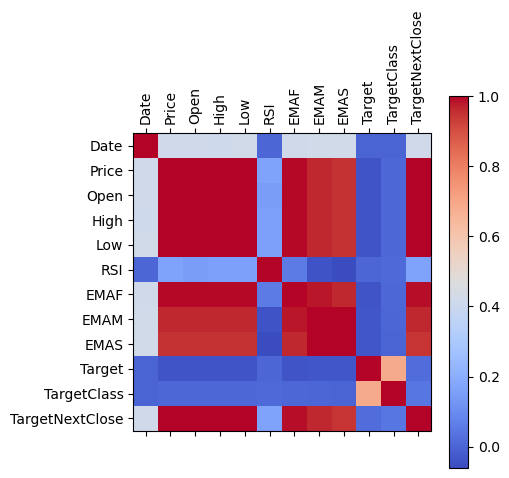

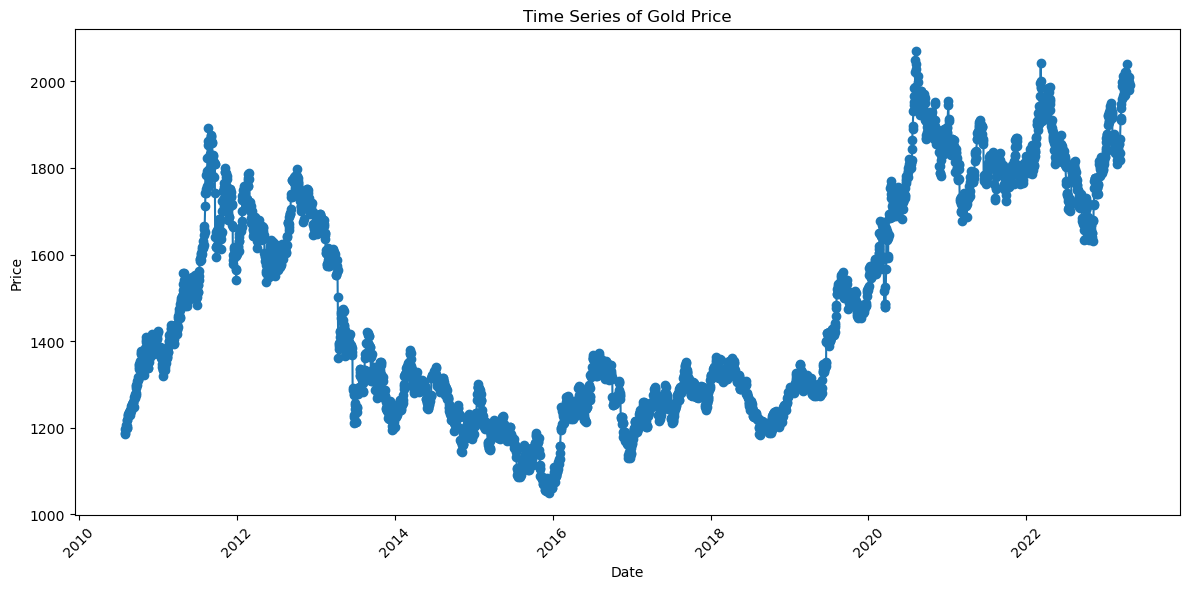

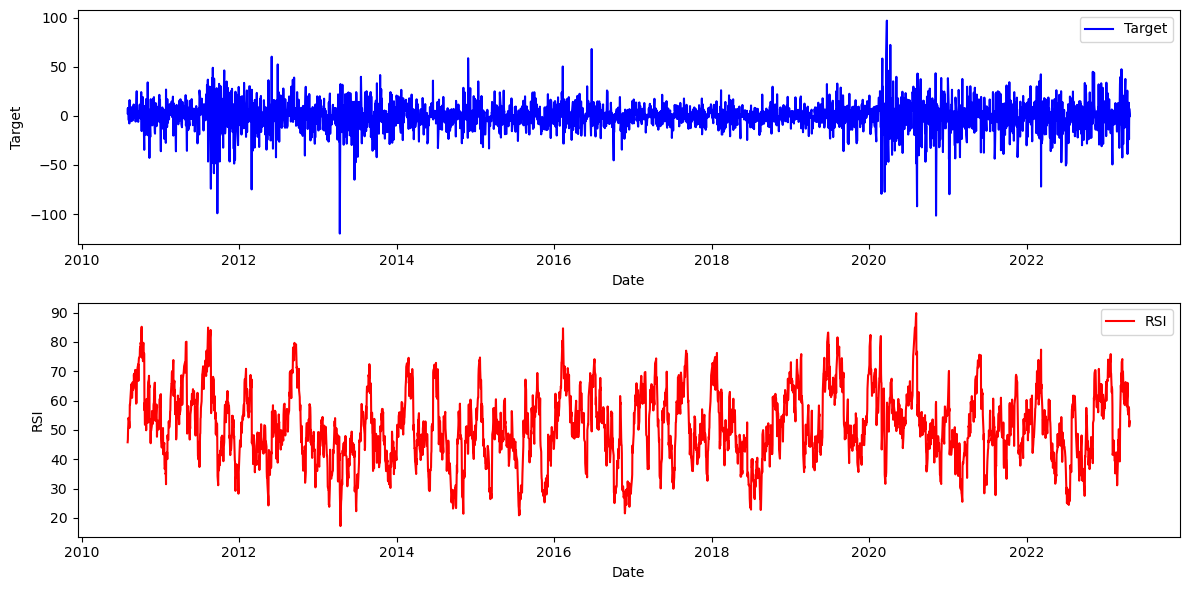

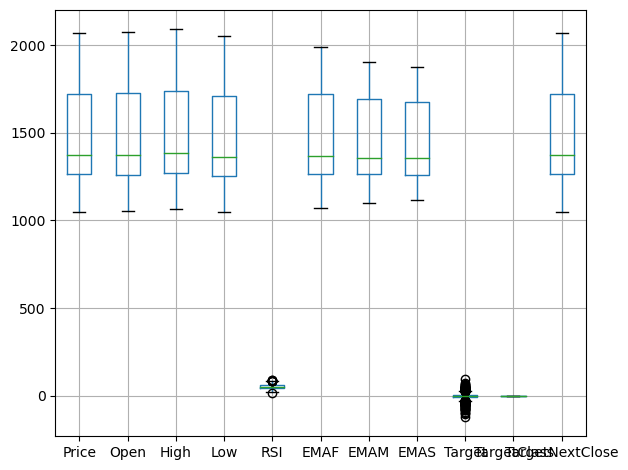

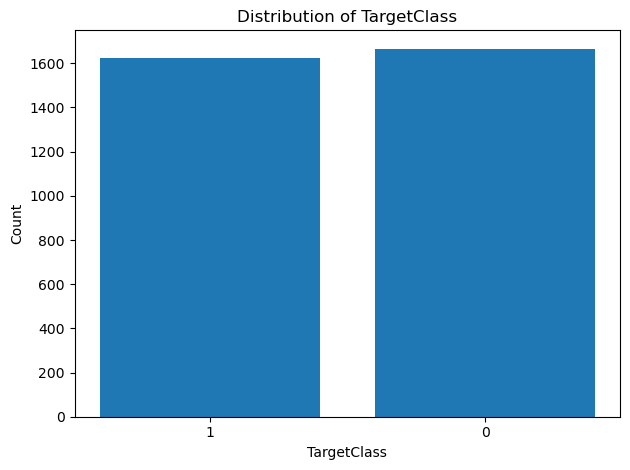

In [64]:
#analyse Statistiques
descriptive_stats = data_set.describe()

# Visualisation de la distribution des variables numériques
data_set.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Corrélations entre variables
correlation_matrix = data_set.corr()
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

# Visualisation de la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(data_set['Date'], data_set['Price'], marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series of Gold Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exploration des variables cibles
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data_set['Date'], data_set['Target'], color='blue', label='Target')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data_set['Date'], data_set['RSI'], color='red', label='RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

plt.tight_layout()
plt.show()

# Gestion des valeurs manquantes et aberrantes
missing_values = data_set.isnull().sum()
outliers = data_set.boxplot()
plt.tight_layout()
plt.show()

# Analyse de la distribution des classes
class_distribution = data_set['TargetClass'].value_counts()
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('TargetClass')
plt.ylabel('Count')
plt.title('Distribution of TargetClass')
plt.xticks(class_distribution.index, ['0', '1'])
plt.tight_layout()
plt.show()



In [85]:
data

,index,Price,Open,High,Low,Change %,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
Date,,,,,,,,,,,,,
2010-08-02,149,1185.4,1183.8,1193.9,1176.7,0.13,45.773169,1190.448118,1181.239868,1160.800000,2.7,1,1187.5
2010-08-03,150,1187.5,1184.8,1193.0,1181.6,0.18,46.682230,1190.167345,1181.363831,1161.153642,7.8,1,1195.9
2010-08-04,151,1195.9,1188.1,1205.5,1187.0,0.71,50.256125,1190.713312,1181.651676,1161.613859,2.3,1,1199.3
2010-08-05,152,1199.3,1197.0,1202.8,1192.0,0.28,51.661291,1191.531092,1182.001147,1162.113013,7.9,1,1205.3
2010-08-06,153,1205.3,1197.4,1213.3,1194.5,0.50,54.112166,1192.842416,1182.462511,1162.685026,-3.7,0,1202.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-18,3434,2010.3,1997.1,2013.4,1994.5,0.81,57.877284,1987.116495,1893.238340,1866.579597,-10.5,0,1998.0
2023-04-19,3435,1998.0,2008.5,2009.7,1971.9,-0.61,55.169602,1988.153019,1895.312828,1868.320265,13.3,1,2009.8
2023-04-20,3436,2009.8,1996.5,2014.5,1994.2,0.59,57.226462,1990.214637,1897.579901,1870.194169,-23.8,0,1981.3


In [129]:
# Supongamos que este es el nuevo orden de columnas que deseas
new_column_order = ['Open', 'High', 'Low', 'Price','RSI','EMAF','EMAM', 'EMAS','Target','TargetClass','TargetNextClose']

# Asigna la lista de nombres de columnas en el nuevo orden
data_set = data_set[new_column_order]

In [131]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.12908576 0.12781296 0.13082902 ... 0.56523744 1.         0.13522259]
 [0.13006147 0.12693619 0.13571144 ... 0.58875058 1.         0.1434595 ]
 [0.1332813  0.13911349 0.14109207 ... 0.56339327 1.         0.14679349]
 ...
 [0.92204117 0.92722845 0.94539657 ... 0.44306132 0.         0.91361051]
 [0.93043224 0.91992207 0.92427262 ... 0.58690641 1.         0.92272995]
 [0.9090643  0.90433512 0.92656437 ... 0.55140618 0.         0.92714258]]


In [37]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

3290
[[[0.12908576 0.12781296 0.13082902 ... 0.13129411 0.09961383 0.05975529]
  [0.13006147 0.12693619 0.13571144 ... 0.13098913 0.09976889 0.06022201]
  [0.1332813  0.13911349 0.14109207 ... 0.13158216 0.10012895 0.06082938]
  ...
  [0.20080008 0.19678519 0.20844958 ... 0.18388217 0.12589973 0.08758826]
  [0.20021466 0.19269362 0.1973894  ... 0.18512738 0.12710468 0.08879457]
  [0.18957947 0.18538724 0.19180949 ... 0.18579883 0.12817678 0.08990799]]

 [[0.13006147 0.12693619 0.13571144 ... 0.13098913 0.09976889 0.06022201]
  [0.1332813  0.13911349 0.14109207 ... 0.13158216 0.10012895 0.06082938]
  [0.14196507 0.1364832  0.14607413 ... 0.13247043 0.10056609 0.06148814]
  ...
  [0.20021466 0.19269362 0.1973894  ... 0.18512738 0.12710468 0.08879457]
  [0.18957947 0.18538724 0.19180949 ... 0.18579883 0.12817678 0.08990799]
  [0.19104303 0.18343887 0.1961937  ... 0.1864684  0.12924252 0.09101716]]

 [[0.1332813  0.13911349 0.14109207 ... 0.13158216 0.10012895 0.06082938]
  [0.14196507 0.1

In [38]:
#3290
#(3260, 30, 8)
#(3260, 1)

In [39]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2608
(2608, 30, 8)
(652, 30, 8)
(2608, 1)
(652, 1)
[[0.2177878 ]
 [0.21484605]
 [0.21984703]
 ...
 [0.84016474]
 [0.84536184]
 [0.84899   ]]


In [41]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
157/157 [==============================] - 8s 30ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 2/30
157/157 [==============================] - 4s 27ms/step - loss: 5.8857e-04 - val_loss: 0.0014
Epoch 3/30
157/157 [==============================] - 4s 26ms/step - loss: 5.5151e-04 - val_loss: 0.0025
Epoch 4/30
157/157 [==============================] - 4s 26ms/step - loss: 6.1854e-04 - val_loss: 0.0023
Epoch 5/30
157/157 [==============================] - 4s 25ms/step - loss: 4.7525e-04 - val_loss: 0.0020
Epoch 6/30
157/157 [==============================] - 4s 25ms/step - loss: 5.4754e-04 - val_loss: 0.0013
Epoch 7/30
157/157 [==============================] - 4s 26ms/step - loss: 5.0936e-04 - val_loss: 0.0010
Epoch 8/30
157/157 [==============================] - 4s 26ms/step - loss: 4.8079e-04 - val_loss: 0.0011
Epoch 9/30
157/157 [==============================] - 4s 27ms/step - loss: 4.5106e-04 - val_loss: 0.0010
Epoch 10/30
157/157 [==============================] - 4s 2

In [42]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

21/21 [==============================] - 1s 13ms/step
[0.84134334] [0.86281624]
[0.84128314] [0.83839969]
[0.8580956] [0.83898804]
[0.82823586] [0.83947833]
[0.83483624] [0.84555795]
[0.83322966] [0.81349284]
[0.8404348] [0.8025103]
[0.80307996] [0.81417925]
[0.79645115] [0.82653461]
[0.81119084] [0.84408708]


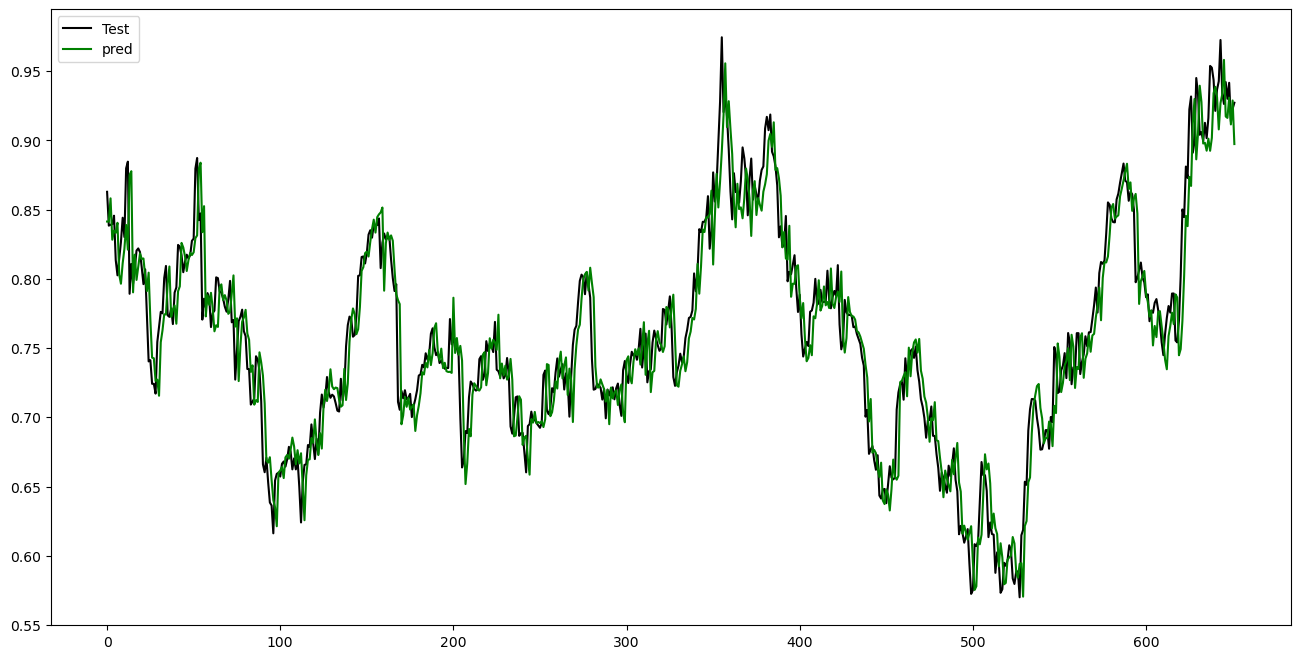

In [43]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
#predicting the closing price of the next candle, but the result is tricky

In [130]:
#using the model to predict Target parameter
#try to predict the movement of the price between the two candles


In [132]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-3])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

3290
[[[0.12908576 0.12781296 0.13082902 ... 0.13129411 0.09961383 0.05975529]
  [0.13006147 0.12693619 0.13571144 ... 0.13098913 0.09976889 0.06022201]
  [0.1332813  0.13911349 0.14109207 ... 0.13158216 0.10012895 0.06082938]
  ...
  [0.20080008 0.19678519 0.20844958 ... 0.18388217 0.12589973 0.08758826]
  [0.20021466 0.19269362 0.1973894  ... 0.18512738 0.12710468 0.08879457]
  [0.18957947 0.18538724 0.19180949 ... 0.18579883 0.12817678 0.08990799]]

 [[0.13006147 0.12693619 0.13571144 ... 0.13098913 0.09976889 0.06022201]
  [0.1332813  0.13911349 0.14109207 ... 0.13158216 0.10012895 0.06082938]
  [0.14196507 0.1364832  0.14607413 ... 0.13247043 0.10056609 0.06148814]
  ...
  [0.20021466 0.19269362 0.1973894  ... 0.18512738 0.12710468 0.08879457]
  [0.18957947 0.18538724 0.19180949 ... 0.18579883 0.12817678 0.08990799]
  [0.19104303 0.18343887 0.1961937  ... 0.1864684  0.12924252 0.09101716]]

 [[0.1332813  0.13911349 0.14109207 ... 0.13158216 0.10012895 0.06082938]
  [0.14196507 0.1

In [133]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2608
(2608, 30, 8)
(652, 30, 8)
(2608, 1)
(652, 1)
[[0.66851083]
 [0.54587367]
 [0.57445828]
 ...
 [0.52374366]
 [0.59197787]
 [0.59428308]]


In [134]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
157/157 [==============================] - 16s 70ms/step - loss: 0.0138 - val_loss: 0.0100
Epoch 2/30
157/157 [==============================] - 10s 60ms/step - loss: 0.0043 - val_loss: 0.0102
Epoch 3/30
157/157 [==============================] - 9s 61ms/step - loss: 0.0044 - val_loss: 0.0117
Epoch 4/30
157/157 [==============================] - 9s 58ms/step - loss: 0.0042 - val_loss: 0.0109
Epoch 5/30
157/157 [==============================] - 9s 58ms/step - loss: 0.0041 - val_loss: 0.0099
Epoch 6/30
157/157 [==============================] - 10s 61ms/step - loss: 0.0038 - val_loss: 0.0098
Epoch 7/30
157/157 [==============================] - 9s 59ms/step - loss: 0.0038 - val_loss: 0.0096
Epoch 8/30
157/157 [==============================] - 9s 58ms/step - loss: 0.0039 - val_loss: 0.0102
Epoch 9/30
157/157 [==============================] - 9s 60ms/step - loss: 0.0039 - val_loss: 0.0100
Epoch 10/30
157/157 [==============================] - 9s 58ms/step - loss: 0.0037 - val

In [135]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

21/21 [==============================] - 2s 28ms/step
[0.5478063] [0.63531581]
[0.5480957] [0.44767174]
[0.547432] [0.54679576]
[0.54770815] [0.55140618]
[0.54781425] [0.58736745]
[0.54794455] [0.41171047]
[0.54786587] [0.50899032]
[0.5482826] [0.60811434]
[0.5490066] [0.62425081]
[0.5489957] [0.61733518]


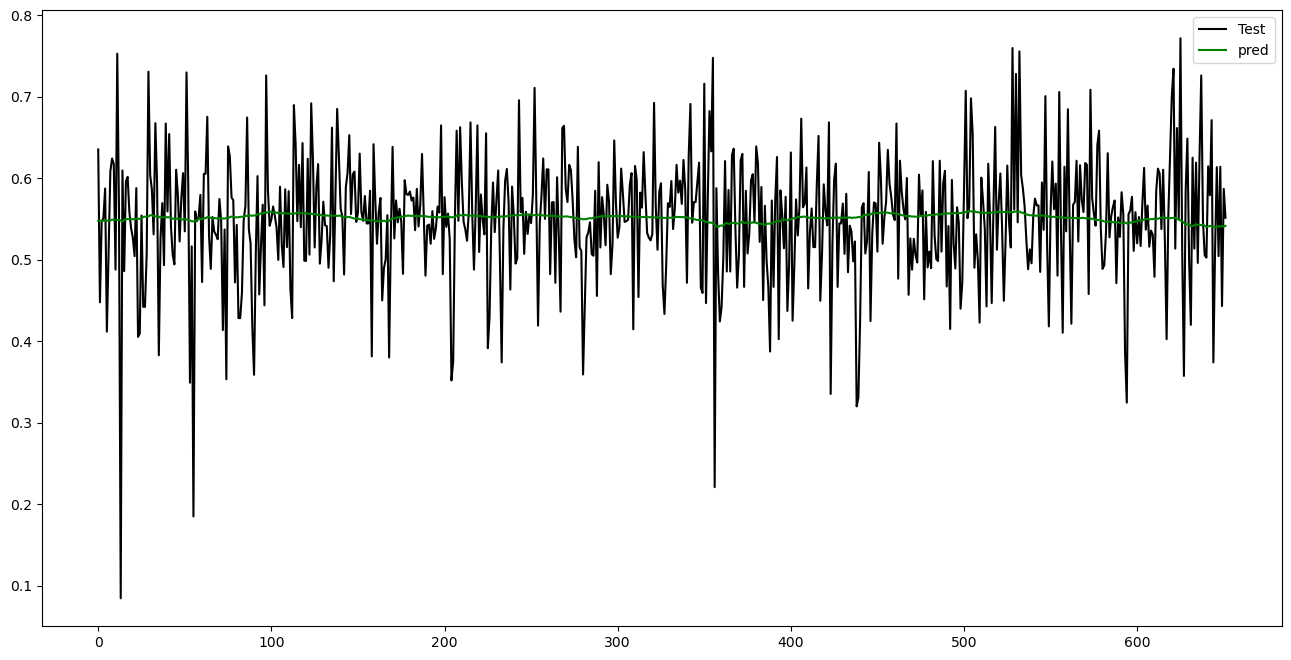

In [136]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [137]:
#decisions trees method

In [138]:
from sklearn.tree import DecisionTreeClassifier

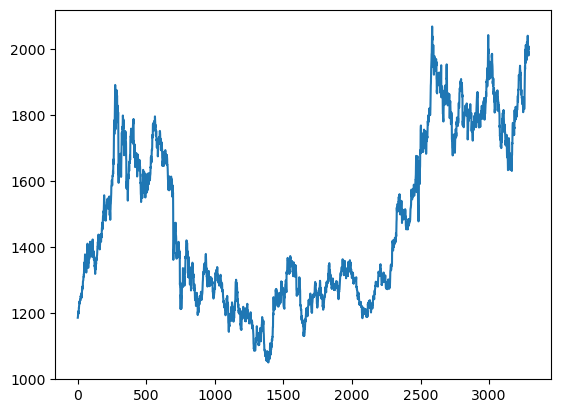

In [141]:
plt.plot(data_set['Price'])

In [144]:
df_dt = data_set
df_dt
#on va utiliser df_dt comme dataframe decisiontrees

,Open,High,Low,Price,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,1183.8,1193.9,1176.7,1185.4,45.773169,1190.448118,1181.239868,1160.800000,2.7,1,1187.5
1,1184.8,1193.0,1181.6,1187.5,46.682230,1190.167345,1181.363831,1161.153642,7.8,1,1195.9
2,1188.1,1205.5,1187.0,1195.9,50.256125,1190.713312,1181.651676,1161.613859,2.3,1,1199.3
3,1197.0,1202.8,1192.0,1199.3,51.661291,1191.531092,1182.001147,1162.113013,7.9,1,1205.3
4,1197.4,1213.3,1194.5,1205.3,54.112166,1192.842416,1182.462511,1162.685026,-3.7,0,1202.6
...,...,...,...,...,...,...,...,...,...,...,...
3285,1997.1,2013.4,1994.5,2010.3,57.877284,1987.116495,1893.238340,1866.579597,-10.5,0,1998.0
3286,2008.5,2009.7,1971.9,1998.0,55.169602,1988.153019,1895.312828,1868.320265,13.3,1,2009.8
3287,1996.5,2014.5,1994.2,2009.8,57.226462,1990.214637,1897.579901,1870.194169,-23.8,0,1981.3
3288,2005.1,2007.0,1973.0,1981.3,51.153087,1989.365624,1899.237724,1871.665769,7.4,1,1990.6


In [145]:
df_dt['Return'] = df_dt['Price'].pct_change(60).shift(-60) #60 days
list_of_features = ['Open',	'High',	'Low',	'Price']
X = df_dt[list_of_features]
y = np.where(df_dt.Return > 0, 1, 0)

C:\Users\leona\AppData\Local\Temp\ipykernel_24524\3970935178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt['Return'] = df_dt['Price'].pct_change(60).shift(-60) #60 days


In [146]:
df_dt

,Open,High,Low,Price,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose,Return
0,1183.8,1193.9,1176.7,1185.4,45.773169,1190.448118,1181.239868,1160.800000,2.7,1,1187.5,0.129492
1,1184.8,1193.0,1181.6,1187.5,46.682230,1190.167345,1181.363831,1161.153642,7.8,1,1195.9,0.127242
2,1188.1,1205.5,1187.0,1195.9,50.256125,1190.713312,1181.651676,1161.613859,2.3,1,1199.3,0.105945
3,1197.0,1202.8,1192.0,1199.3,51.661291,1191.531092,1182.001147,1162.113013,7.9,1,1205.3,0.119403
4,1197.4,1213.3,1194.5,1205.3,54.112166,1192.842416,1182.462511,1162.685026,-3.7,0,1202.6,0.126359
...,...,...,...,...,...,...,...,...,...,...,...,...
3285,1997.1,2013.4,1994.5,2010.3,57.877284,1987.116495,1893.238340,1866.579597,-10.5,0,1998.0,NaN
3286,2008.5,2009.7,1971.9,1998.0,55.169602,1988.153019,1895.312828,1868.320265,13.3,1,2009.8,NaN
3287,1996.5,2014.5,1994.2,2009.8,57.226462,1990.214637,1897.579901,1870.194169,-23.8,0,1981.3,NaN
3288,2005.1,2007.0,1973.0,1981.3,51.153087,1989.365624,1899.237724,1871.665769,7.4,1,1990.6,NaN


In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=423, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2303, 4)
(987, 4)
(2303,)
(987,)


In [152]:
treeClassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)
treeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [153]:
y_pred = treeClassifier.predict(X_test)

In [154]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.23      0.36       464
           1       0.59      0.97      0.73       523

    accuracy                           0.62       987
   macro avg       0.72      0.60      0.55       987
weighted avg       0.72      0.62      0.56       987



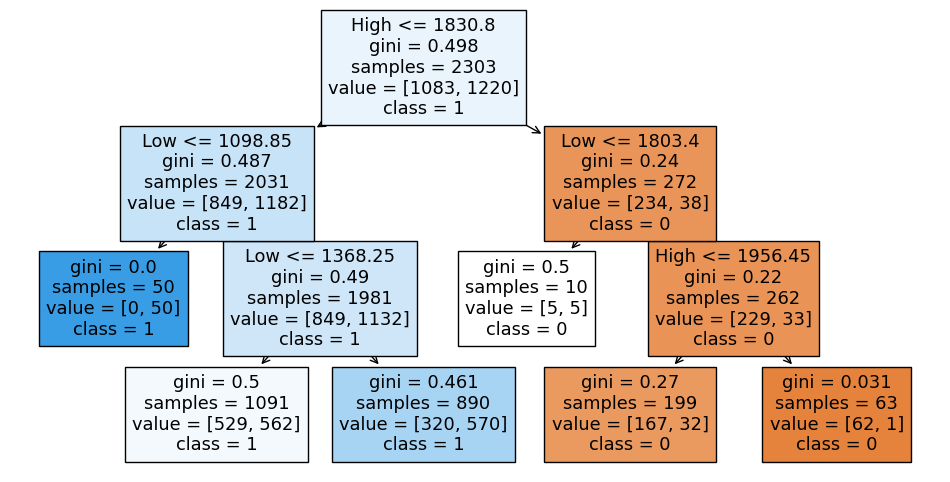

In [162]:
from sklearn import tree
import matplotlib.pyplot as plt

# Crear y entrenar el modelo de árbol de decisiones (treeClassifier)
# Supongamos que ya tienes el modelo entrenado

# Obtener la representación del árbol en formato DOT
dot_data = tree.export_graphviz(treeClassifier, filled=True, feature_names=list_of_features, class_names=['0', '1'])

# Crear una figura y dibujar el árbol utilizando matplotlib
plt.figure(figsize=(12, 6))
tree.plot_tree(treeClassifier, filled=True, feature_names=list_of_features, class_names=['0', '1'])
plt.show()



In [163]:
# random forest 

In [164]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
df_rf = data
df_rf

,Date,Price,Open,High,Low,Vol.,Change %
0,2010-01-04,1118.3,1099.0,1124.6,1093.8,155480.0,2.02
1,2010-01-05,1118.7,1122.0,1129.6,1115.5,156410.0,0.04
2,2010-01-06,1136.5,1118.5,1141.0,1116.8,176900.0,1.59
3,2010-01-07,1133.7,1139.0,1139.5,1128.7,121150.0,-0.25
4,2010-01-08,1138.9,1131.5,1140.0,1119.5,212620.0,0.46
...,...,...,...,...,...,...,...
3435,2023-04-19,1998.0,2008.5,2009.7,1971.9,920.0,-0.61
3436,2023-04-20,2009.8,1996.5,2014.5,1994.2,420.0,0.59
3437,2023-04-21,1981.3,2005.1,2007.0,1973.0,620.0,-1.42
3438,2023-04-24,1990.6,1983.2,1991.0,1975.3,540.0,0.47


In [180]:
#create the model
model = RandomForestRegressor()

In [181]:
X = df_rf[['Open', 'High', 'Low', 'Vol.']]
X = X[:int(len(df_rf) - 1)]
y = df_rf['Price']
y = y[:int(len(df_rf) - 1)]
model.fit(X,y)

RandomForestRegressor()

In [182]:
predictions = model.predict(X)
print('Le score model est:' , model.score(X,y))

Le score model est: 0.999891502842203


In [183]:
#faire les predictions
new_data = df_rf[['Open', 'High', 'Low', 'Vol.']].tail(1)
prediction = model.predict(new_data)
print('The model predicts the last row or a day to be:', prediction)
print('Actual value is:', df_rf[['Price']].tail(1).values[0][0])

The model predicts the last row or a day to be: [1990.956]
Actual value is: 1995.1


In [184]:
#support vector Regression

Erreur quadratique moyenne : 21.75999246378584


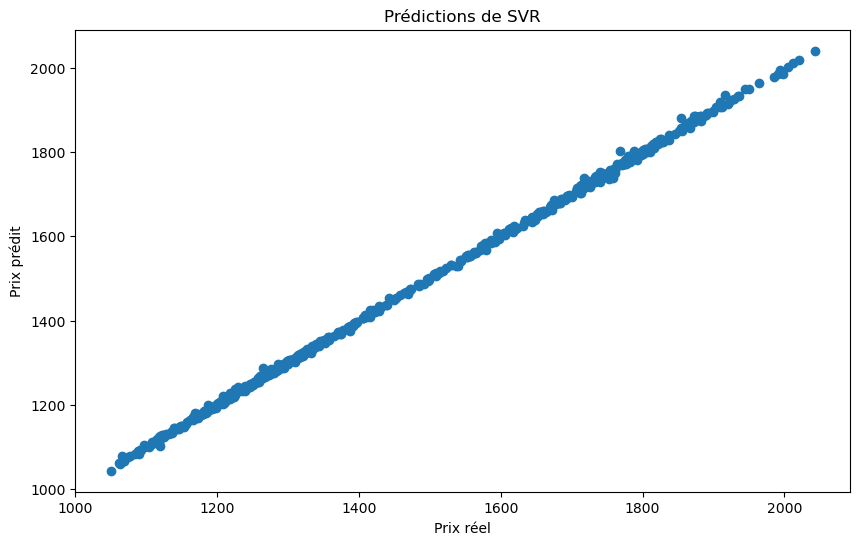

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt


df_svr = data

caracteristiques_selectionnees = ['Open', 'High', 'Low', 'Vol.', 'Change %']

# Créer le jeu de caractéristiques X et la cible y
X = df_svr[caracteristiques_selectionnees]
y = df_svr['Price']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mettre à l'échelle les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer et entraîner le modèle SVR
modele_svr = SVR(kernel='linear')  # Tu peux ajuster le noyau et d'autres hyperparamètres
modele_svr.fit(X_train_scaled, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = modele_svr.predict(X_test_scaled)

# Évaluer le modèle (tu peux ajouter d'autres métriques en fonction de tes besoins)
mse = np.mean((y_pred - y_test)**2)
print("Erreur quadratique moyenne :", mse)

# Visualiser les prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("Prédictions de SVR")
plt.show()

In [187]:
#ARIMA SERIES TEMPorelles

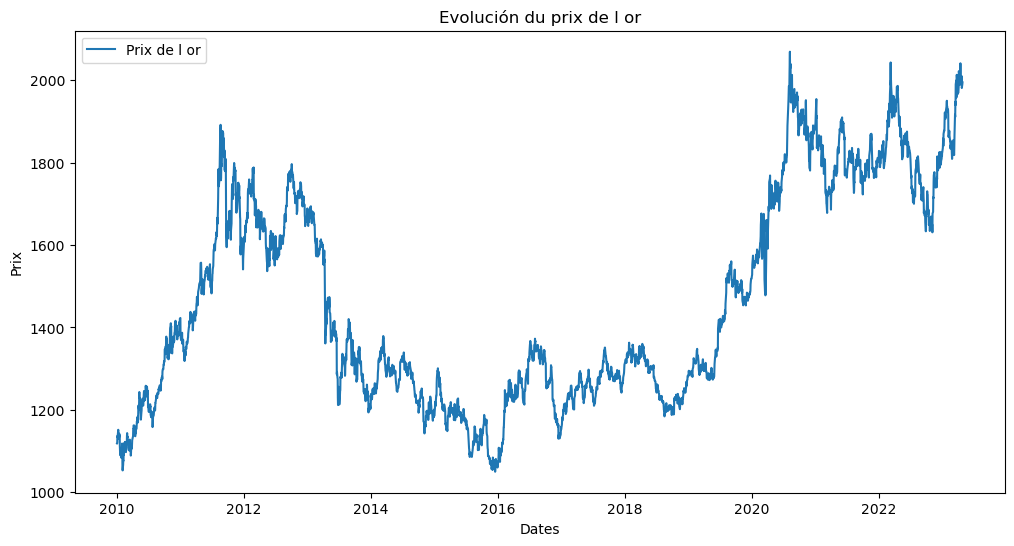

In [215]:
#visualisationd e la ST
#data.set_index('Date' , inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Prix de l or')
plt.xlabel('Dates')
plt.ylabel('Prix')
plt.title('Evolución du prix de l or')
plt.legend()

plt.show()

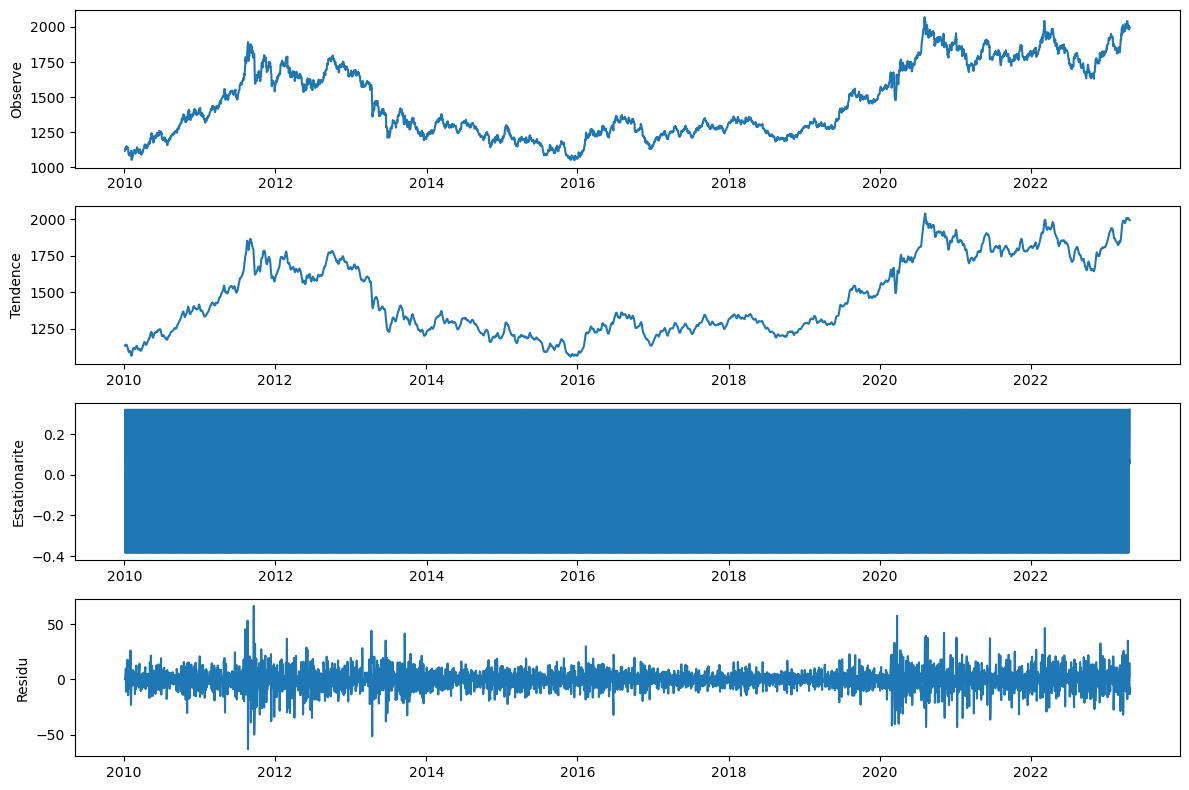

In [217]:
#decomposition dela serie: tendencia, estacionalidad y residuos
data['Price'] = data['Price'].interpolate()
data = data.asfreq('D')

data = data.fillna(0) 


from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Price'], model='additive')

# Visualizar los componentes de la descomposición
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.ylabel('Observe')
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.ylabel('Tendence')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.ylabel('Estationarite')
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.ylabel('Residu')
plt.tight_layout()
plt.show()

In [222]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1200x600 with 0 Axes>

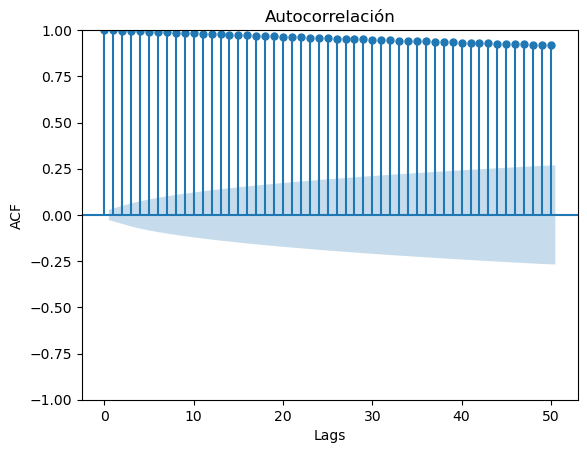

<Figure size 1200x600 with 0 Axes>

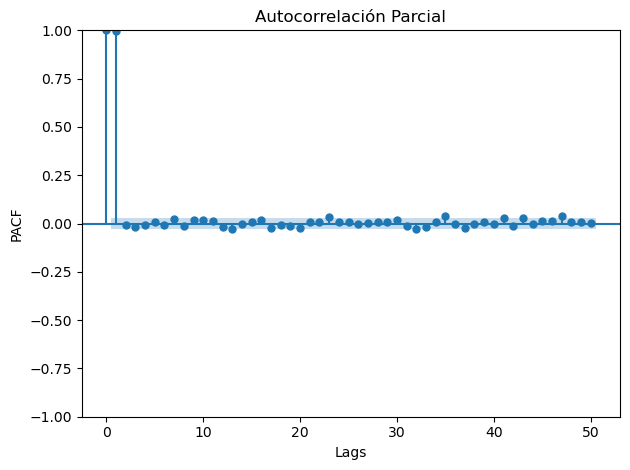

In [227]:
# Crear gráfico de autocorrelación (ACF)
plt.figure(figsize=(12, 6))
plot_acf(data['Price'], lags=50, alpha=0.05)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('Autocorrelación')

# Crear gráfico de autocorrelación parcial (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(data['Price'], lags=50, alpha=0.05)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Autocorrelación Parcial')

plt.tight_layout()
plt.show()

In [234]:
def run_simulation(returns, prices, amt, order, thresh, verbose=False, plot=True):
    if type(order) == float:
        thresh = None
        
    curr_holding = False
    events_list = []
    init_amt = amt

    #go through dates
    for date, r in tqdm (returns.iloc[14:].items(), total=len(returns.iloc[14:])):
        #if you're currently holding the stock, sell it
        if curr_holding:
            sell_price = prices.loc[date]
            curr_holding=False
            ret = (sell_price-buy_price)/buy_price
            amt *= (1+ret)
            events_list.append(('s', date, ret))
            
            if verbose:
                print('Sold at $%s'%sell_price)
                print('Predicted Return: %s'%round(pred,4))
                print('Actual Return: %s'%(round(ret, 4)))
                print('=======================================')
            continue

        #get data til just before current date
        curr_data = returns[:date]
        
        if type(order) == tuple:
            try:
                #fit model
                model = ARIMA(curr_data, order=order).fit(maxiter=200)

                #get forecast
                pred = model.forecast()[0][0]

            except:
                pred = thresh - 1



        #if you predict a high enough return and not holding, buy stock
        if (not curr_holding) and \
        ((type(order) == float and np.random.random() < order) 
         or (type(order) == tuple and pred > thresh)
         or (order == 'last' and curr_data[-1] > 0)):
            
            curr_holding = True
            buy_price = prices.loc[date]
            events_list.append(('b', date))
            if verbose:
                print('Bought at $%s'%buy_price)
                
    if verbose:
        print('Total Amount: $%s'%round(amt,2))
        
    #graph
    if plot:
    
        plt.figure(figsize=(10,4))
        plt.plot(prices[14:])

        y_lims = (int(prices.min()*.95), int(prices.max()*1.05))
        shaded_y_lims = int(prices.min()*.5), int(prices.max()*1.5)

        for idx, event in enumerate(events_list):
            plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
            if event[0] == 's':
                color = 'green' if event[2] > 0 else 'red'
                plt.fill_betweenx(range(*shaded_y_lims), 
                                  event[1], events_list[idx-1][1], color=color, alpha=0.1)

        tot_return = round(100*(amt / init_amt - 1), 2)
        tot_return = str(tot_return) + '%'
        plt.title("%s Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s"%(tickerSymbol, thresh, round(amt,2), tot_return), fontsize=20)
        plt.ylim(*y_lims)
        plt.show()
    
    return amt




In [228]:
# Calcula los retornos diarios y elimina los valores faltantes
returns = data['Price'].pct_change().dropna()


Text(0, 0.5, 'Prices')

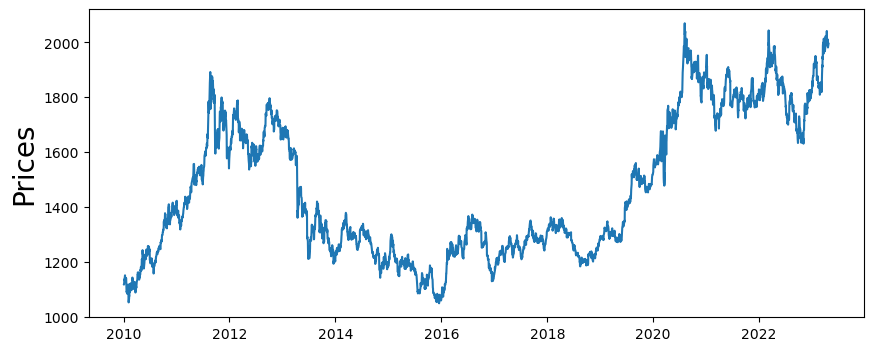

In [229]:
plt.figure(figsize=(10, 4))
plt.plot(data['Price'])
plt.ylabel('Prices', fontsize=20)


Text(0, 0.5, 'Return')

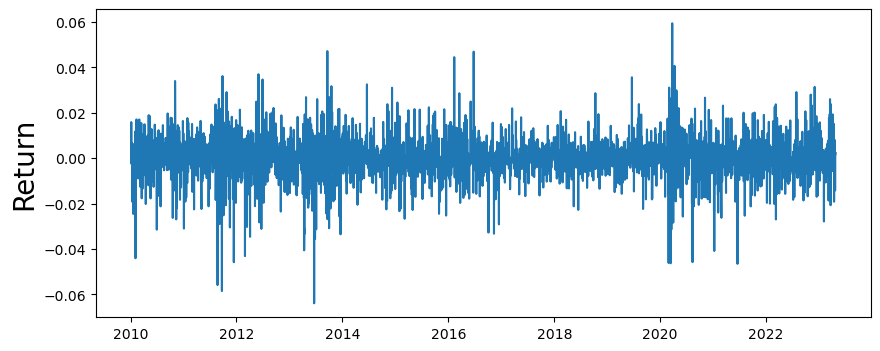

In [230]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Return', fontsize=20)

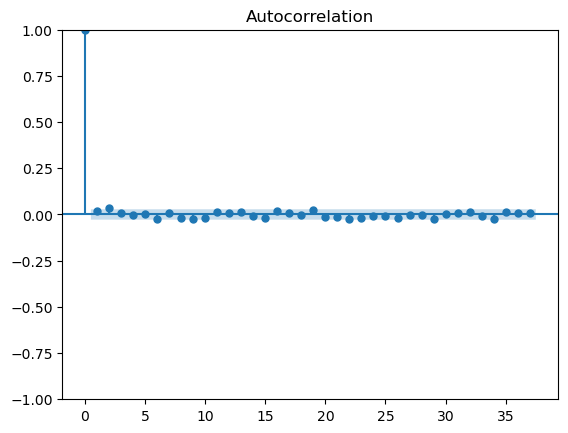

In [231]:
plot_acf(returns)
plt.show()

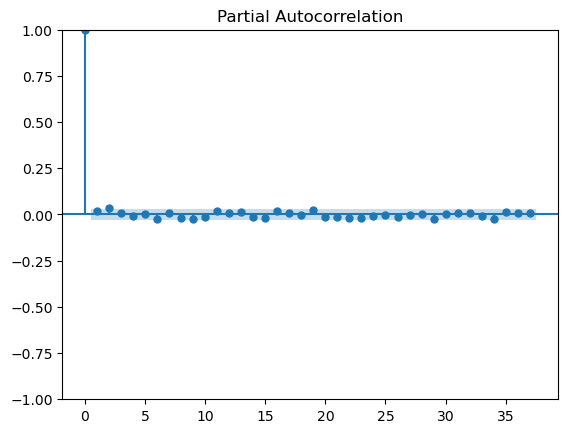

In [232]:
plot_pacf(returns)
plt.show()

In [239]:
import seaborn as sns
from tqdm import tqdm

100%|████████████████████████████████████████████████████████████████████████████| 4845/4845 [00:00<00:00, 6886.86it/s]


NameError: name 'tickerSymbol' is not defined

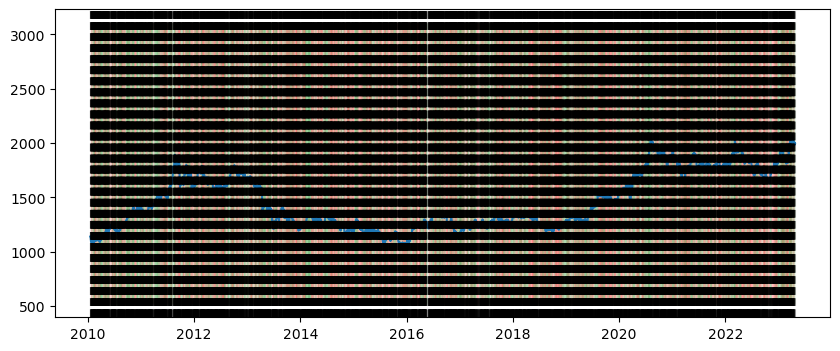

In [240]:
run_simulation(returns, data['Price'], 100, 0.5, None, verbose=False)

In [242]:
final_amts = [run_simulation(returns, data['Price'], 100, 0.5, None, verbose=False, plot=False) for _ in range(1000)]

100%|███████████████████████████████████████████████████████████████████████████| 4845/4845 [00:00<00:00, 10305.60it/s]


C:\Users\leona\AppData\Local\Temp\ipykernel_24524\2783033276.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_amts)


Text(0.5, 1.0, 'Avg: $124.02\nSD: $32.11')

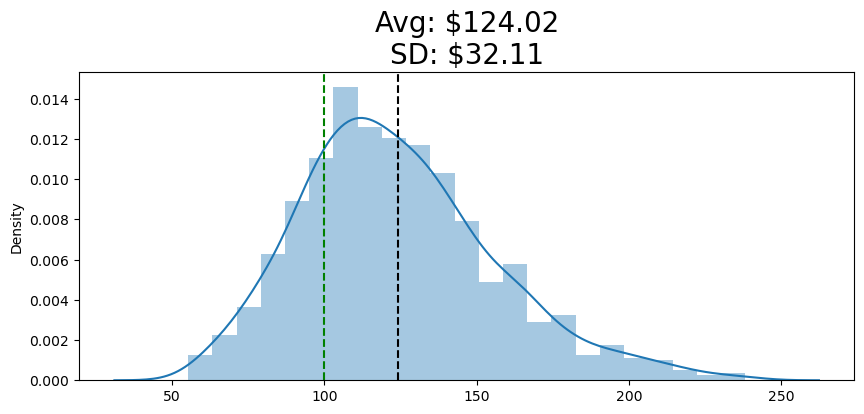

In [243]:
plt.figure(figsize=(10,4))
sns.distplot(final_amts)
plt.axvline(np.mean(final_amts), color='k', linestyle='--')
plt.axvline(100, color='g', linestyle='--')
plt.title('Avg: $%s\nSD: $%s'%(round(np.mean(final_amts),2), round(np.std(final_amts),2)), fontsize=20)

100%|███████████████████████████████████████████████████████████████████████████| 4845/4845 [00:00<00:00, 10382.89it/s]


NameError: name 'tickerSymbol' is not defined

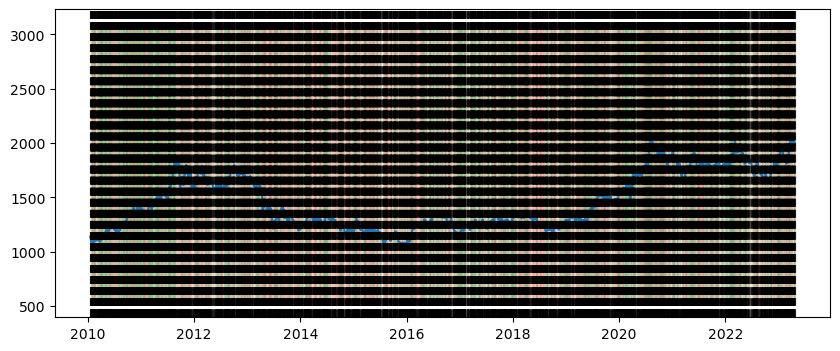

In [244]:
run_simulation(returns, data['Price'], 100, 'last', None, verbose=False)

In [3]:
data

NameError: name 'data' is not defined

Régression Linéaire: RMSE = 6.93294874981245
Arbres de Décision: RMSE = 16.473577549137335
Forêts Aléatoires: RMSE = 11.825895905143822
SVR: RMSE = 532.459359449541


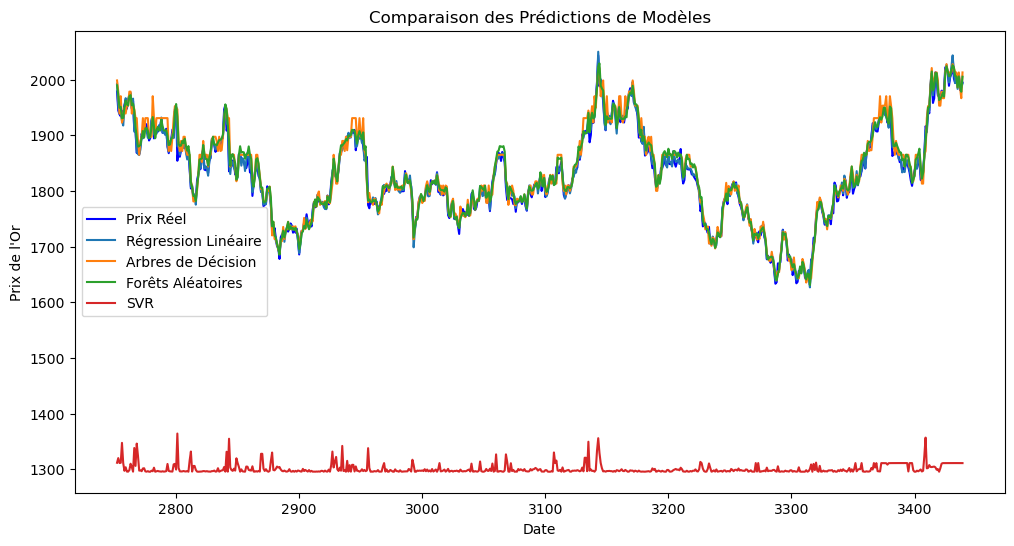

In [16]:
# Importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from statsmodels.tsa.api import ARIMA  # Modification ici
from sklearn.metrics import mean_squared_error
from math import sqrt

# Séparation des caractéristiques (X) et de la cible (y)
X = data[['Open', 'High', 'Low', 'Vol.']]
y = data['Price']

# Diviser les données en ensembles d'entraînement et de test
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Modèles de régression
models = {
    'Régression Linéaire': LinearRegression(),
    'Arbres de Décision': DecisionTreeRegressor(),
    'Forêts Aléatoires': RandomForestRegressor(),
    'SVR': SVR(),
    
}

# Entraînement et évaluation des modèles
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print(f'{model_name}: RMSE = {rmse}')

# Vous pouvez également comparer d'autres métriques comme le R², le MAE, etc.

# Visualisation des prédictions
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size:], y_test, label='Prix Réel', color='blue')
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plt.plot(data.index[train_size:], y_pred, label=model_name)

plt.xlabel('Date')
plt.ylabel('Prix de l\'Or')
plt.title('Comparaison des Prédictions de Modèles')
plt.legend()
plt.show()




In [17]:
#graphiques pour analyse financieres


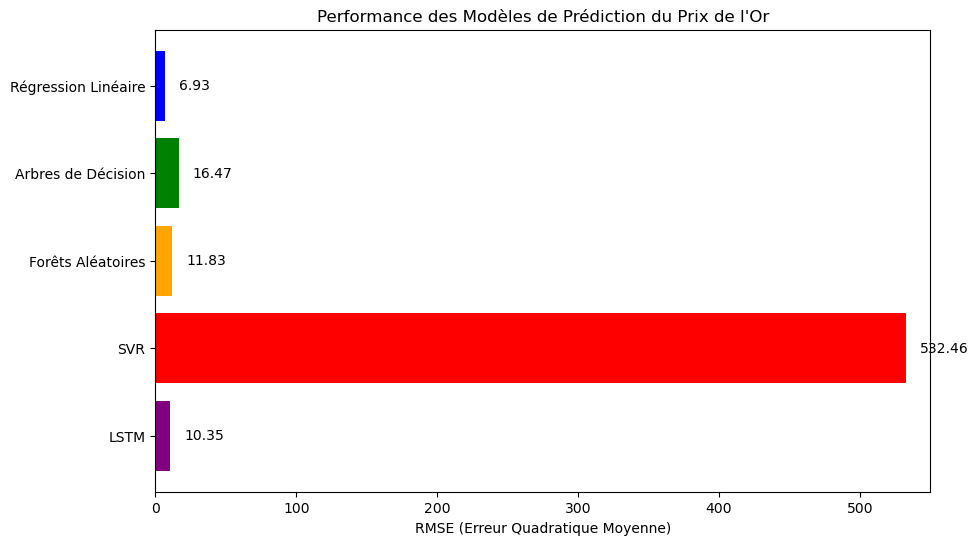

In [19]:
import matplotlib.pyplot as plt

# RMSE des modèles
rmse_values = [6.93, 16.47, 11.83, 532.46, 10.35]  # Ajout de LSTM
model_names = ['Régression Linéaire', 'Arbres de Décision', 'Forêts Aléatoires', 'SVR', 'LSTM']  # Ajout de LSTM

# Créer un graphique à barres pour comparer les RMSE
plt.figure(figsize=(10, 6))
plt.barh(model_names, rmse_values, color=['blue', 'green', 'orange', 'red', 'purple'])  # Ajout de LSTM
plt.xlabel('RMSE (Erreur Quadratique Moyenne)')
plt.title('Performance des Modèles de Prédiction du Prix de l\'Or')
plt.gca().invert_yaxis()  # Inverser l'ordre des modèles pour le meilleur en haut
plt.xlim(0, 550)  # Ajuster la plage de l'axe des x en fonction des données

# Ajouter les valeurs RMSE au-dessus des barres
for i, v in enumerate(rmse_values):
    plt.text(v + 10, i, str(v), color='black', va='center')

plt.show()


In [29]:
data_set.to_excel('data_gold_pp.xlsx', index=False)

,Date,Price,Open,High,Low,Vol.,Change %,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,2010-08-02,1185.4,1183.8,1193.9,1176.7,89850.0,0.13,45.773169,1190.448118,1181.239868,1160.800000,2.7,1,1187.5
1,2010-08-03,1187.5,1184.8,1193.0,1181.6,67040.0,0.18,46.682230,1190.167345,1181.363831,1161.153642,7.8,1,1195.9
2,2010-08-04,1195.9,1188.1,1205.5,1187.0,119100.0,0.71,50.256125,1190.713312,1181.651676,1161.613859,2.3,1,1199.3
3,2010-08-05,1199.3,1197.0,1202.8,1192.0,76530.0,0.28,51.661291,1191.531092,1182.001147,1162.113013,7.9,1,1205.3
4,2010-08-06,1205.3,1197.4,1213.3,1194.5,105720.0,0.50,54.112166,1192.842416,1182.462511,1162.685026,-3.7,0,1202.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,2023-04-18,2010.3,1997.1,2013.4,1994.5,220.0,0.81,57.877284,1987.116495,1893.238340,1866.579597,-10.5,0,1998.0
3286,2023-04-19,1998.0,2008.5,2009.7,1971.9,920.0,-0.61,55.169602,1988.153019,1895.312828,1868.320265,13.3,1,2009.8
3287,2023-04-20,2009.8,1996.5,2014.5,1994.2,420.0,0.59,57.226462,1990.214637,1897.579901,1870.194169,-23.8,0,1981.3
3288,2023-04-21,1981.3,2005.1,2007.0,1973.0,620.0,-1.42,51.153087,1989.365624,1899.237724,1871.665769,7.4,1,1990.6
